### PDF Extractor
I extracted a pdf of a Blue Chip article about consumer habits during the pandemic.

In [69]:
import fitz
import pandas as pd
from collections import Counter

doc = fitz.open('BlueChip.pdf')
text = "".join(page.get_text("text") for page in doc)
words = pd.Series(text.split())
words.value_counts().head(30)

the           113
and            81
to             73
of             61
in             43
a              30
shopping       24
their          23
will           19
that           18
shoppers       18
brands         17
grocery        17
in-store       16
experience     15
2020           15
for            15
with           15
blue           15
rights         14
chip.          14
All            14
©              14
as             14
reserved.      14
be             13
new            13
retailers      13
have           12
online         12
dtype: int64

### Reddit Image Transcriber
I used the r/aww reddit thread which contains both photos and videos.

In [141]:
import requests
from PIL import Image
import io
import pytesseract
import pandas as pd
import matplotlib.pyplot as plt
data = requests.get("https://www.reddit.com/r/technicallythetruth/.json", headers = {'User-agent': 'your bot 0.1'}).json()


In [142]:
#The title and url for each post
title = []
url = []
for i in data['data']['children']:
    title.append(i['data']['title'])
    if(i['data']['url'].endswith('.png') or i['data']['url'].endswith('.jpg')):
        url.append(i['data']['url'])
url

['https://i.redd.it/ayifbmjnm2z61.jpg',
 'https://i.redd.it/b87hpgvjozy61.jpg',
 'https://i.redd.it/o1pwppz5w2z61.png',
 'https://i.redd.it/7a8ymdcm01z61.jpg',
 'https://i.redd.it/g56u0pgno1z61.jpg',
 'https://i.redd.it/dz7u19s812z61.jpg',
 'https://i.redd.it/ww3sh904g2z61.png',
 'https://i.redd.it/b7iy9n3an1z61.jpg',
 'https://i.redd.it/2yn4v99sv2z61.jpg',
 'https://i.redd.it/4vno8cpplyy61.jpg',
 'https://i.imgur.com/4X5bMkU.jpg',
 'https://i.redd.it/vqkjbocn21z61.jpg',
 'https://i.redd.it/4kdpmm32z2z61.jpg',
 'https://i.redd.it/6hgpqc37a2z61.jpg',
 'https://i.redd.it/kt65dmzcl3z61.png',
 'https://i.redd.it/x7bybrf8x2z61.jpg',
 'https://i.redd.it/7mrnvzzhe3z61.jpg',
 'https://i.redd.it/chioujb99yy61.jpg',
 'https://i.redd.it/7bhh639yw1z61.jpg',
 'https://i.redd.it/k1o978rkfzy61.jpg',
 'https://i.redd.it/qaq06uz433z61.jpg',
 'https://i.imgur.com/wJ8hLCN.jpg',
 'https://i.redd.it/fktfe5od10z61.jpg',
 'https://i.redd.it/60nlq346fwy61.jpg',
 'https://i.redd.it/u3pp8t2h3wy61.jpg']

are             24
for             23
probably        23
lyou            23
looking         23
itwas           23
image,          23
deleted.        23
an              23
a                2
of               1
Yes,             1
like             1
Didn't.          1
mean             1
<a               1
No.              1
fele}asie)a)     1
(falcon          1
masterpiece      1
you              1
|                1
human            1
Ima              1
asia             1
film             1
truely           1
No               1
Delivered        1
it               1
She.             1
car              1
ers|             1
was              1
dtype: int64


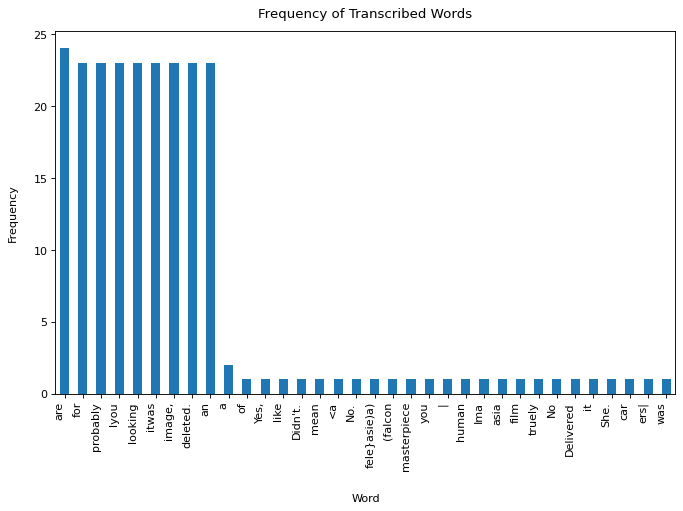

In [143]:
text = []
words = []
plt.figure(figsize=(10, 6), dpi=80)
for u in url:
    response = requests.get(u+'.json')
    img = Image.open(io.BytesIO(response.content))
    text.append(pytesseract.image_to_string(img))
for t in text:
    words.extend(t.split())
words = pd.Series(words)
print(words.value_counts())
words.value_counts().plot(kind='bar')
y_pos = np.arange(len(words.value_counts()))
plt.xticks(y_pos, fontsize='10', horizontalalignment='right')
plt.xlabel("Word", labelpad=20)
plt.ylabel("Frequency", labelpad=14)
plt.title("Frequency of Transcribed Words", y=1.02)
plt.show()

### Face Finding
I used a stock image of a couple people standing and smiling at the camera for my image

In [119]:
import numpy as np
import cv2
import urllib
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')


img = cv2.imread('stockphoto.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)


In [67]:
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()